In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("Housing.csv")

In [3]:
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
ds.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for col in categorical_cols:
    ds[col] = le.fit_transform(ds[col])

In [6]:
X,y = ds[["area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"]],ds["price"]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [11]:
print(f"MAE: {MAE}\nMSE: {MSE}\nr2_score: {r2} ")

MAE: 716583.439661547
MSE: 986041803890.027
r2_score: 0.6578047592637595 


In [12]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 104406.20866453275
Coefficients: [ 2.53732234e+02  1.26430216e+05  1.00306572e+06  4.31159234e+05
  4.34983941e+05  3.95198712e+05  3.30288607e+05  1.20896581e+06
  8.59967238e+05  2.20086777e+05  6.93749764e+05 -2.55656836e+05]


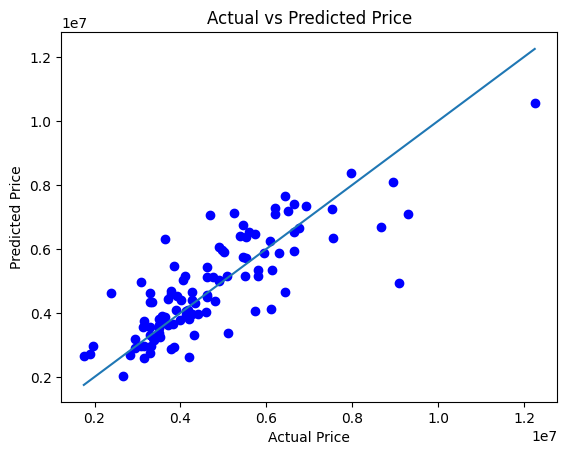

In [16]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()